<a href="https://colab.research.google.com/github/francobarrionuevoenv21/ClusteringPaddyFields_Fires_SanJavier/blob/main/03_CoverTypes2022_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NDVI temporal signature (time series) for cover types in Bajo de los Saladillos (2022)

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

## Procesamiento de los datos

In [2]:
!wget https://raw.githubusercontent.com/francobarrionuevoenv21/ClusteringPaddyFields_Fires_SanJavier/refs/heads/main/Primary_data/MODIS_TS_byCoverType.csv

--2025-06-08 14:43:26--  https://raw.githubusercontent.com/francobarrionuevoenv21/ClusteringPaddyFields_Fires_SanJavier/refs/heads/main/Primary_data/MODIS_TS_byCoverType.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319925 (312K) [text/plain]
Saving to: ‘MODIS_TS_byCoverType.csv’

MODIS_TS_byCoverTyp 100%[===================>] 312.43K  --.-KB/s    in 0.01s   

2025-06-08 14:43:26 (29.8 MB/s) - ‘MODIS_TS_byCoverType.csv’ saved [319925/319925]



In [4]:
# Load the csv file
dfLoaded = pd.read_csv('/content/MODIS_TS_byCoverType.csv')
dfLoaded = dfLoaded.drop(columns=['system:index', '.geo'])

In [12]:
dfLoaded.head(10)

,2000_02_18,2000_03_05,2000_03_21,2000_04_06,2000_04_22,2000_05_08,2000_05_24,2000_06_09,2000_06_25,2000_07_11,...,2022_08_13,2022_08_29,2022_09_14,2022_09_30,2022_10_16,2022_11_01,2022_11_17,2022_12_03,2022_12_19,Cobertura
0,0.45,0.51,0.52,0.66,0.73,0.67,0.66,0.67,0.61,0.60,...,0.51,0.54,0.51,0.41,0.38,0.38,0.36,0.36,0.34,ArrocerasN1
1,0.86,0.83,0.72,0.60,0.51,0.35,0.38,0.40,0.35,0.26,...,0.33,0.36,0.41,0.34,0.32,0.29,0.22,0.28,0.24,ArrocerasN2
2,0.54,0.48,0.54,0.68,0.69,0.68,0.64,0.66,0.60,0.60,...,0.48,0.50,0.51,0.27,0.26,0.27,0.27,0.32,0.65,ArrocerasN3
3,0.55,0.51,0.61,0.70,0.69,0.67,0.66,0.68,0.65,0.70,...,0.38,0.41,0.42,0.38,0.39,0.43,0.39,0.54,0.52,ArrocerasN4
4,0.72,0.72,0.74,0.70,0.78,0.76,0.72,0.75,0.75,0.69,...,0.54,0.62,0.65,0.61,0.61,0.53,0.43,0.52,0.51,ArrocerasM1
5,0.82,0.86,0.82,0.77,0.74,0.72,0.68,0.62,0.67,0.60,...,0.58,0.54,0.48,0.44,0.42,0.39,0.35,0.40,0.42,ArrocerasM2
6,0.73,0.77,0.73,0.78,0.77,0.75,0.70,0.72,0.66,0.66,...,0.54,0.57,0.62,0.53,0.51,0.52,0.50,0.54,0.47,ArrocerasM3
7,0.79,0.78,0.77,0.67,0.58,0.51,0.41,0.45,0.51,0.55,...,0.51,0.55,0.62,0.51,0.50,0.47,0.45,0.50,0.47,ArrocerasM4
8,0.80,0.83,0.79,0.81,0.85,0.82,0.81,0.82,0.77,0.68,...,0.27,0.30,0.27,0.27,0.28,0.31,0.29,0.55,0.82,ArrocerasM5
9,0.66,0.67,0.47,0.74,0.72,0.78,0.70,0.70,0.64,0.56,...,0.28,0.30,0.27,0.25,0.29,0.30,0.63,0.85,0.85,ArrocerasS1


In [ ]:
# Extract the NDVI values
matrixNDVISamples = dfLoaded.iloc[:, :-1].to_numpy()
matrixNDVISamples = matrixNDVISamples*10000

In [5]:
# Get dates and cover types values
listDates = list(dfLoaded.columns)
listSamples = list(dfLoaded['Cobertura'])

In [9]:
# Data pivoting
dfNDVITransver = pd.DataFrame()

for i, s in enumerate(listSamples):
  dfNDVITransver[s] = matrixNDVISamples[i, :]

dfNDVITransver['Fecha'] = listDates[:-1]
dfNDVITransver['Fecha'] = pd.to_datetime(dfNDVITransver['Fecha'], format='%Y_%m_%d') #'%m/%d/%Y'

<ipython-input-9-b3830c60a133>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfNDVITransver[s] = matrixNDVISamples[i, :]
<ipython-input-9-b3830c60a133>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfNDVITransver[s] = matrixNDVISamples[i, :]
<ipython-input-9-b3830c60a133>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

In [14]:
 dfNDVITransver.head(5)

,ArrocerasN1,ArrocerasN2,ArrocerasN3,ArrocerasN4,ArrocerasM1,ArrocerasM2,ArrocerasM3,ArrocerasM4,ArrocerasM5,ArrocerasS1,...,SabanasM2,SabanasM3,SabanasM4,SabanasM5,SabanasN1,SabanasN2,SabanasN3,SabanasN4,SabanasN5,Fecha
0,4500.0,8600.0,5400.0,5500.0,7200.0,8200.0,7300.0,7900.0,8000.0,6600.0,...,7000.0,6200.0,7100.0,6800.0,6600.0,7500.0,7900.0,7600.0,7400.0,2000-02-18
1,5100.0,8300.0,4800.0,5100.0,7200.0,8600.0,7700.0,7800.0,8300.0,6700.0,...,7600.0,7200.0,7600.0,7400.0,7300.0,7800.0,8100.0,6700.0,6500.0,2000-03-05
2,5200.0,7200.0,5400.0,6100.0,7400.0,8200.0,7300.0,7700.0,7900.0,4700.0,...,7700.0,5800.0,7200.0,7100.0,7100.0,7600.0,7900.0,6800.0,6900.0,2000-03-21
3,6600.0,6000.0,6800.0,7000.0,7000.0,7700.0,7800.0,6700.0,8100.0,7400.0,...,7700.0,7700.0,6700.0,7700.0,7100.0,7700.0,8000.0,7200.0,7100.0,2000-04-06
4,7300.0,5100.0,6900.0,6900.0,7800.0,7400.0,7700.0,5800.0,8500.0,7200.0,...,7400.0,7500.0,7700.0,7400.0,7600.0,7800.0,8200.0,7200.0,7600.0,2000-04-22


## Graficos EDA

In [15]:
# Get cover type's names
listSamplesClean = []

for s in listSamples:
  if s[-3] == 'S' or s[-3] == 'M' or s[-3] == 'N': # S: Sur (South), M: Medio (Middle), N: Norte (North)
    listSamplesClean.append(s[:-3])
  else:
    listSamplesClean.append(s[:-2])

listSamplesClean = list(set(listSamplesClean))

print(listSamplesClean)

['Estero o bañados', 'Sabanas', 'Forestal', 'Pastizales', 'Arroceras', 'Parcelas A-G', 'Bosque']


BosqueN


<ipython-input-20-5f392d283d31>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-20-5f392d283d31>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-20-5f392d283d31>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-20-5f392d283d31>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=4

BosqueM
BosqueS


<ipython-input-20-5f392d283d31>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-20-5f392d283d31>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-20-5f392d283d31>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
<ipython-input-20-5f392d283d31>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=4

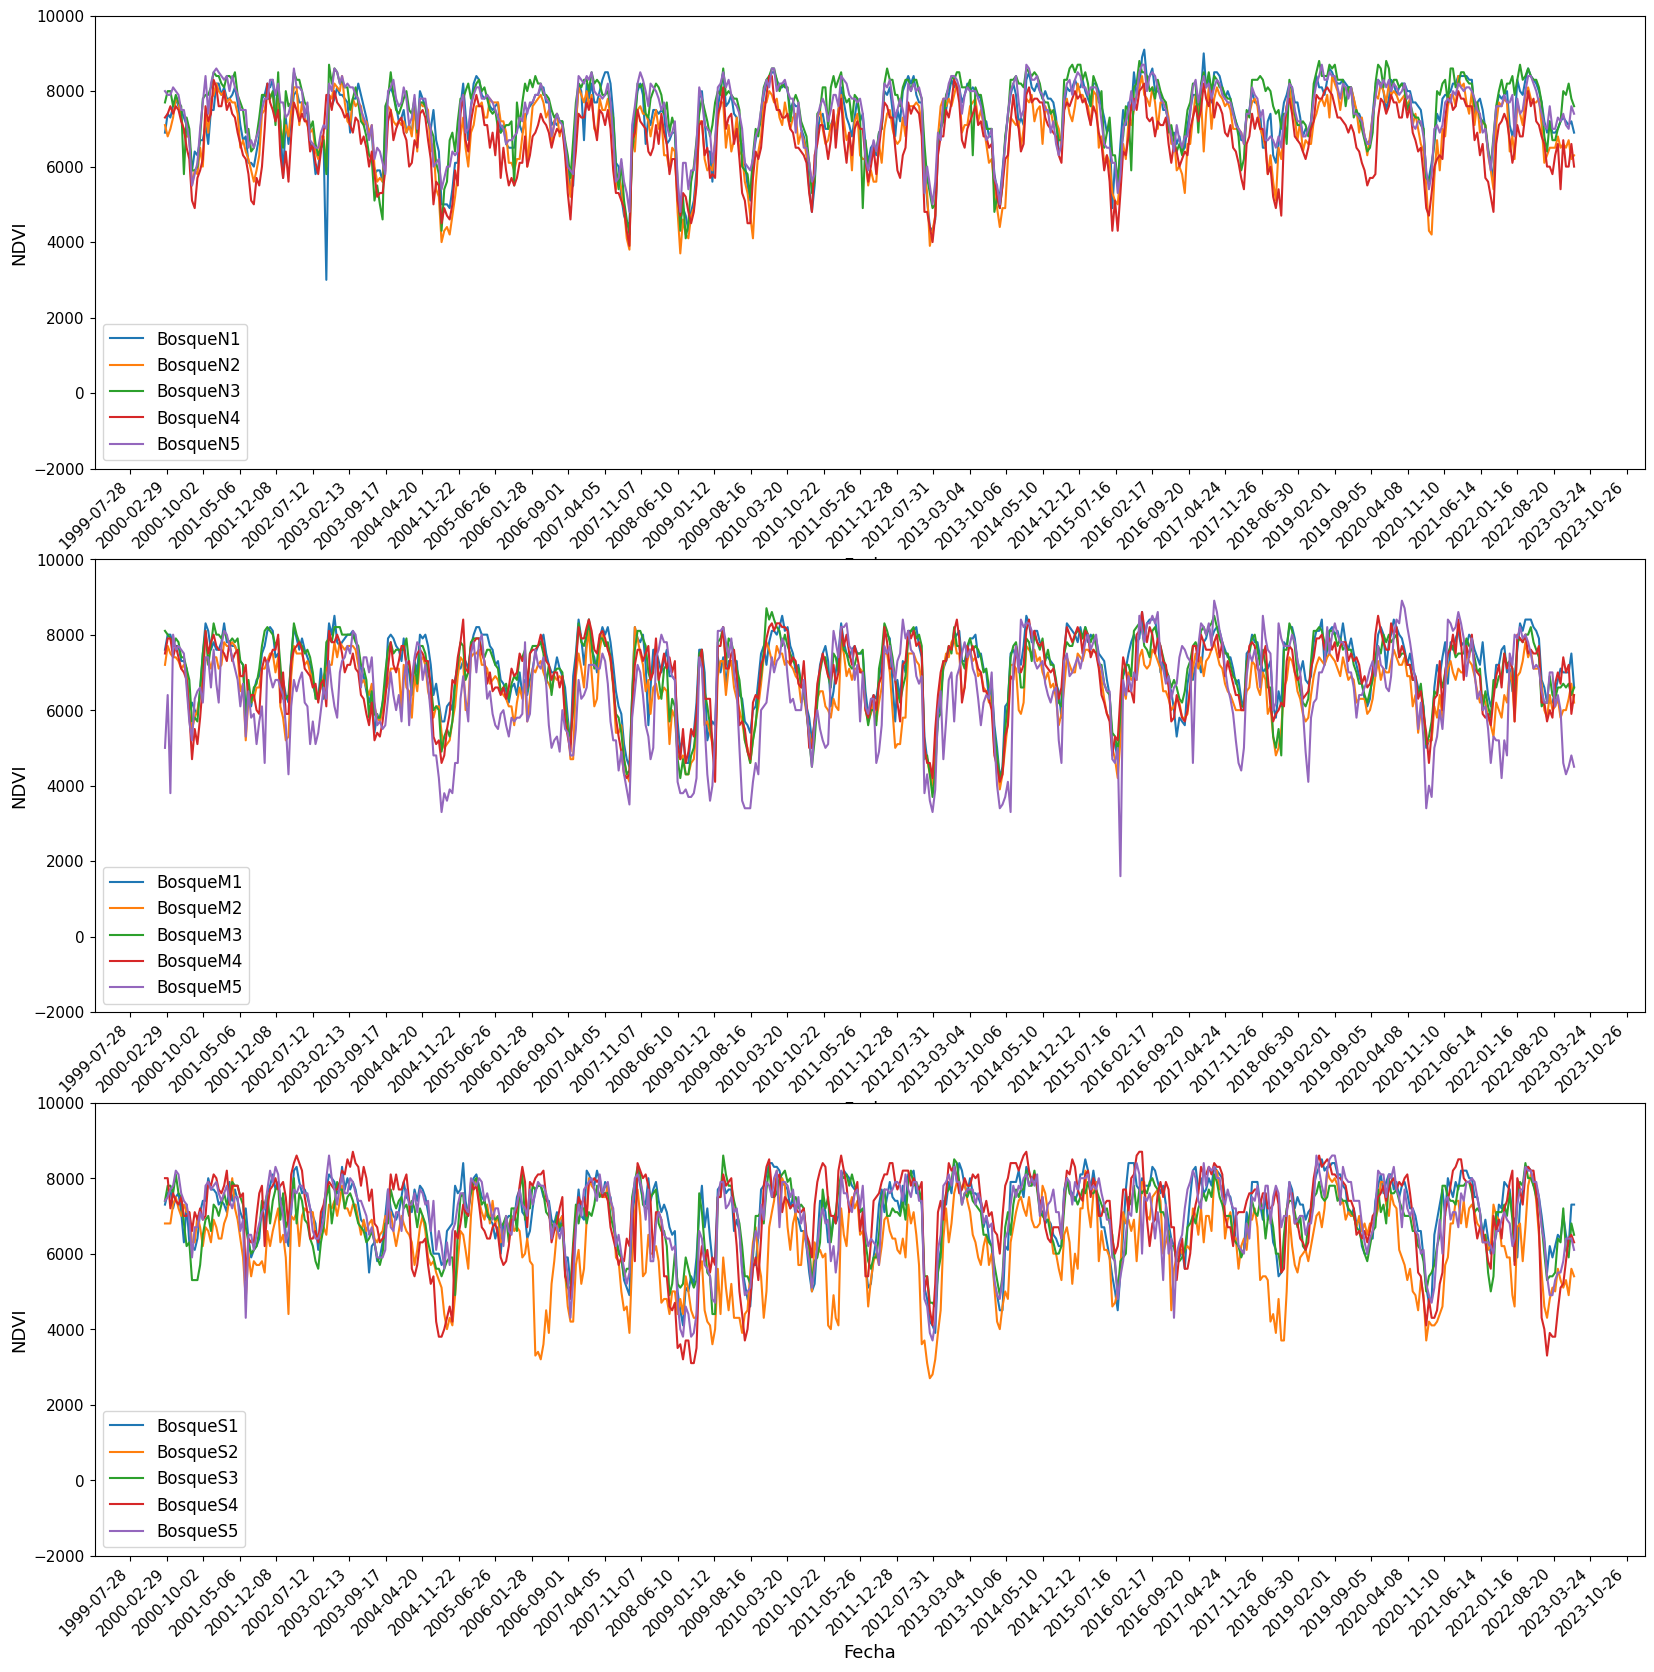

In [20]:
s = 6 # Cover type position in listSamplesClean

fig, axs = plt.subplots(3, 1, figsize=(20, 20))

pos = 0
for z in ['N', 'M', 'S']:
  print(f'{listSamplesClean[s]}{z}')
  dfNDVITransverFilt = dfNDVITransver.filter(like=f'{listSamplesClean[s]}{z}')#.plot()
  for subS in list(dfNDVITransverFilt.columns):
    axs[pos].plot(dfNDVITransver['Fecha'], np.array(dfNDVITransverFilt[subS]),
        label=subS)

    axs[pos].set_ylabel('NDVI', fontsize=13)
    axs[pos].set_xlabel('Fecha', fontsize=13)
    axs[pos].legend(fontsize=12, loc='best')

    # Adjust the frequency of x-axis ticks
    axs[pos].xaxis.set_major_locator(plt.MultipleLocator(base=24*9))  # Adjust to desired frequency
    axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
    axs[pos].tick_params(axis='both', labelsize=11)

    axs[pos].set_ylim([-2000, 10000])

  pos += 1

plt.show()

## Analisis especifico-Arroceras N-Oct-2010 a Feb-2016

<ipython-input-10-bc2bc4c92cc6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=10)


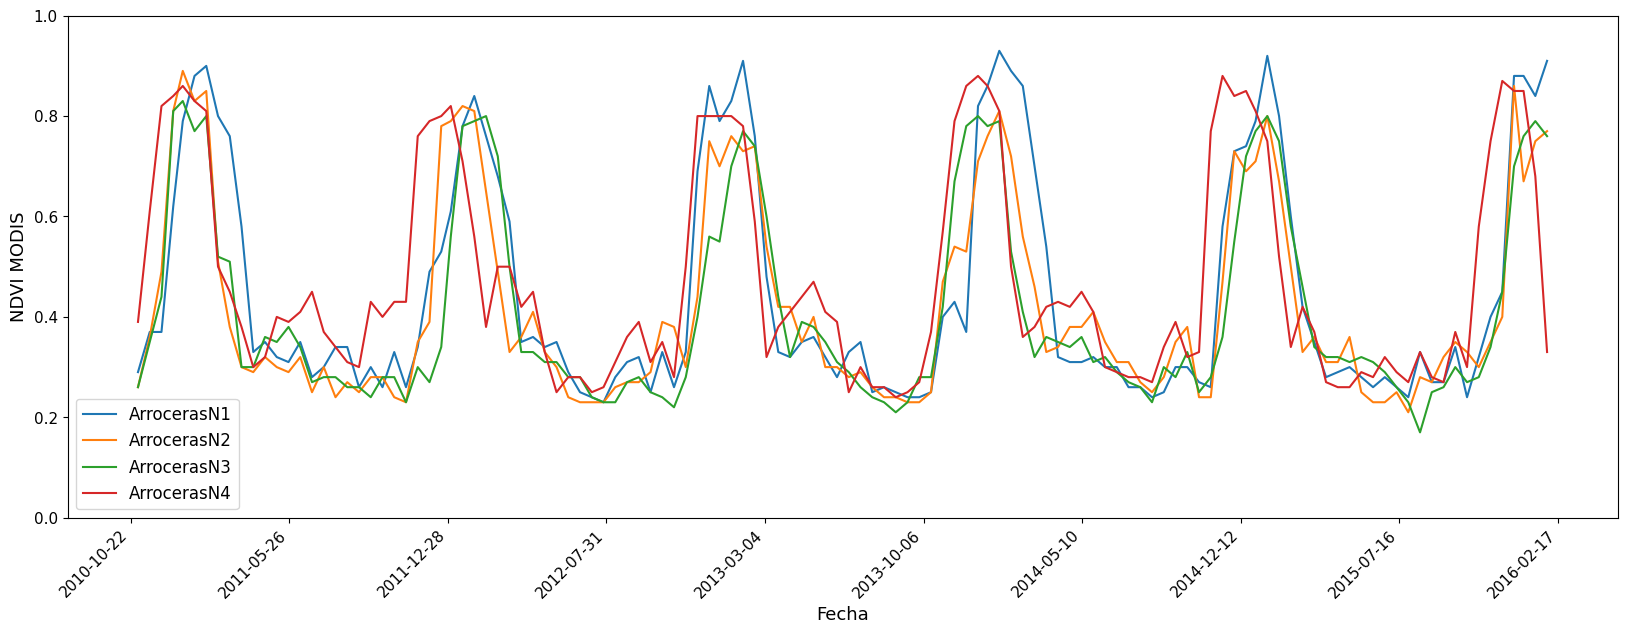

In [ ]:
listArrocN = ['ArrocerasN1', 'ArrocerasN2', 'ArrocerasN3', 'ArrocerasN4']
startDateAN = '2010-10-22'
endDateAN = '2016-02-17'

dfNDVITransverFilt01 = dfNDVITransver.copy()

dfNDVITransverFilt01 = dfNDVITransverFilt01[(dfNDVITransverFilt01['Fecha'] >= startDateAN) & (dfNDVITransverFilt01['Fecha'] <= endDateAN)]

fig, axs = plt.subplots(figsize=(20, 6.52))#, sharex=True)

for subS in list(listArrocN):
  axs.plot(dfNDVITransverFilt01['Fecha'],
    np.array(dfNDVITransverFilt01[subS])/10000, # Normalizo
    label=subS)

  axs.set_ylabel('NDVI MODIS', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
  axs.set_xlabel('Fecha', fontsize=13)
  axs.legend(fontsize=12, loc='best')

  # Adjust the frequency of x-axis ticks
  axs.xaxis.set_major_locator(plt.MultipleLocator(base=24*9))  # Adjust to desired frequency
  axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=10)
  axs.tick_params(axis='both', labelsize=11)

  #axs[pos].set_xlim([-2000, 10000])
  axs.set_ylim([0, 1])

plt.show()

In [ ]:
dfNDVITransverFilt01MV = dfNDVITransverFilt01[listArrocN].copy()
listFechas = dfNDVITransverFilt01['Fecha'].astype('str')

listMeses = [int(f[5:7]) for f in listFechas]

dfMeanNDVIxMM = pd.DataFrame()

dfMeanNDVIxMM['MeanNDVI'] = np.mean(dfNDVITransverFilt01MV.to_numpy(), axis=1)
dfMeanNDVIxMM['Mes'] = [int(f[5:7]) for f in listFechas]

In [ ]:
listMeanNDVIVal = []

for m in range(1, 13):
  listMeanNDVIVal.append(dfMeanNDVIxMM[dfMeanNDVIxMM['Mes']==m]['MeanNDVI'].mean())

In [ ]:
listMeanNDVIVal

[7843.75,
 6740.909090909091,
 4510.0,
 3457.5,
 3392.5,
 2972.5,
 2692.5,
 2702.5,
 2982.5,
 2962.5,
 4238.636363636364,
 6656.25]

In [ ]:
listMeanNDVIVal[0]-listMeanNDVIVal[7]

5141.25

<ipython-input-68-507677ca43e1>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(), rotation=0, ha='right', fontsize=11)


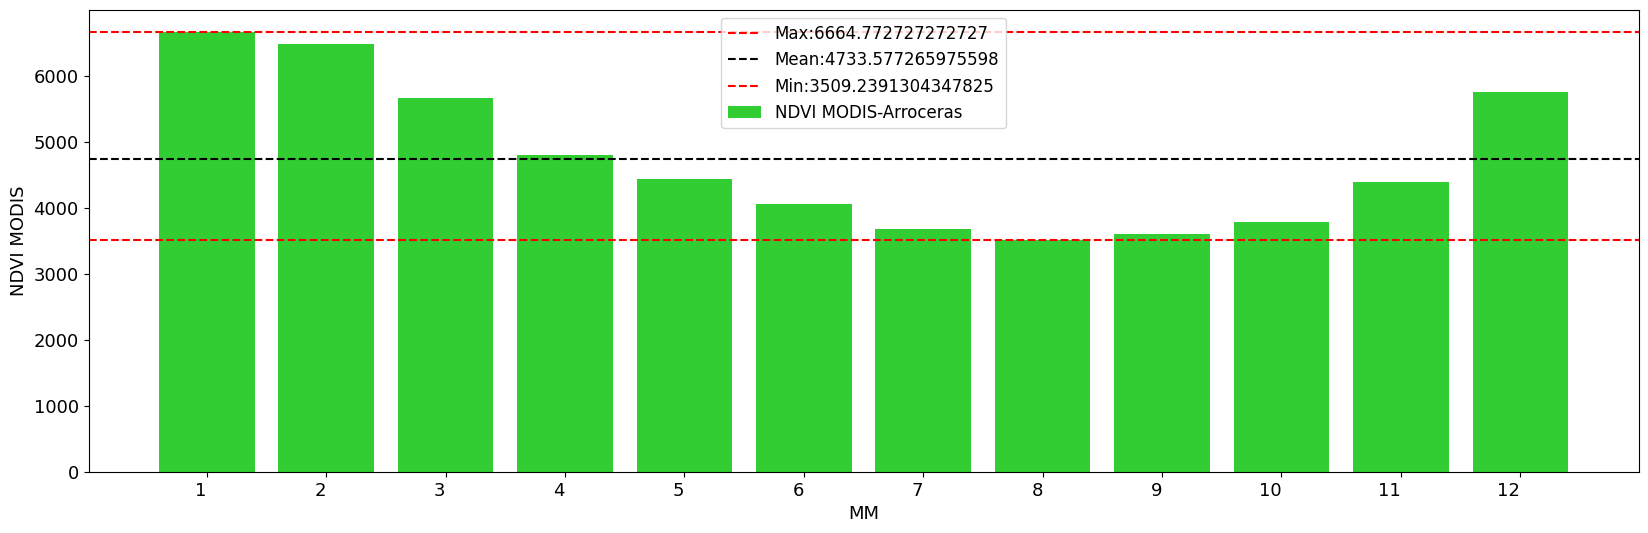

In [ ]:
fig, axs = plt.subplots(figsize=(20, 6))#, sharex=True)

axs.bar([m for m in range(1, 13)], np.array(listMeanNDVIVal),
        color='limegreen',
        width =0.8,
        label='NDVI MODIS-Arroceras')

axs.set_ylabel('NDVI MODIS', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
axs.set_xlabel('MM', fontsize=13)
#axs.legend(fontsize=12)

axs.axhline(y=np.array(listMeanNDVIVal).max(), label=f'Max:{np.array(listMeanNDVIVal).max()}',color='red', linestyle='--')
axs.axhline(y=np.array(listMeanNDVIVal).mean(), label=f'Mean:{np.array(listMeanNDVIVal).mean()}',color='black', linestyle='--')
axs.axhline(y=np.array(listMeanNDVIVal).min(), label=f'Min:{np.array(listMeanNDVIVal).min()}',color='red', linestyle='--')


axs.legend(fontsize=12)
# Adjust the frequency of x-axis ticks
axs.xaxis.set_major_locator(plt.MultipleLocator(base=1))  # Adjust to desired frequency
axs.set_xticklabels(axs.get_xticklabels(), rotation=0, ha='right', fontsize=11)
axs.tick_params(axis='both', labelsize=13)

plt.show()

In [ ]:
data = dfNDVITransverFilt01MV.to_numpy().flatten()

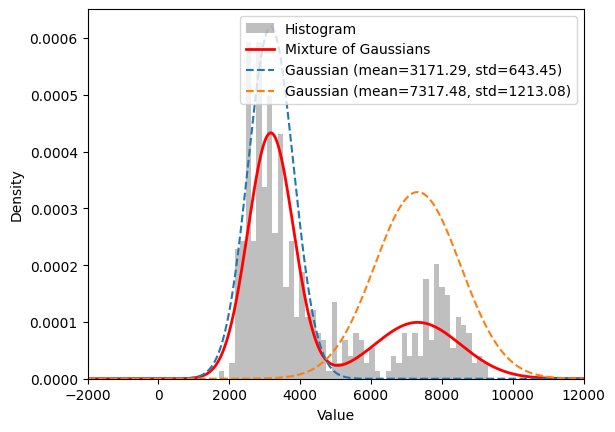

Component 1: Mean = 3171.29, Standard Deviation = 643.45
Component 2: Mean = 7317.48, Standard Deviation = 1213.08


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# Assuming your data is stored in a variable named 'data'
# Fit a mixture of two Gaussian distributions to the data
gmm = GaussianMixture(n_components=2)
gmm.fit(data.reshape(-1, 1))  # Reshape the data if it's 1D

# Get the parameters of the fitted distributions
means = gmm.means_.flatten()
stds = np.sqrt(gmm.covariances_).flatten()

# Plot the histogram of the data and the fitted distributions
plt.hist(data, bins=50, density=True, alpha=0.5, color='gray', label='Histogram')
x = np.linspace(-2000, 12000, 1000)
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))
plt.plot(x, pdf, color='red', lw=2, label='Mixture of Gaussians')
for mean, std in zip(means, stds):
    plt.plot(x, norm.pdf(x, mean, std), '--', label=f'Gaussian (mean={mean:.2f}, std={std:.2f})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='best')
plt.xlim(-2000,12000)
plt.show()

# Print the mean values and standard deviations for each component
for i, (mean, std) in enumerate(zip(means, stds)):
    print(f'Component {i + 1}: Mean = {mean:.2f}, Standard Deviation = {std:.2f}')
